## **Thu thập dữ liệu**

#### Chủ đề của dữ liệu là gì?
  * **Chủ đề:** Bộ dữ liệu chứa thông tin chi tiết về các bài hát trên nền tảng ứng dụng **Spotify**, bao gồm các đặc trưng âm thanh như **danceability** (độ có thể nhảy), **energy** (năng lượng), **key** (điệu), và **popularity** (độ phổ biến).
  * **Bối cảnh:** Dữ liệu đại diện cho các bài hát thuộc 125 thể loại nhạc khác nhau, phản ánh đặc điểm âm nhạc và mức độ phổ biến của chúng trên nền tảng ứng dụng Spotify.

#### Nguồn gốc của dữ liệu là ở đâu?
  * **Nền tảng:** Hugging Face.
  * **URL:** [Hugging Face](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)
  * **Tác giả:** Maharshi Pandya.
  * **Ngày công bố:** Bộ dữ liệu được cập nhật khoảng 2 năm trước (theo thông tin commit trên Hugging Face).

#### Dữ liệu này có được cấp phép để bạn sử dụng không?
  * **Giấy phép:** Trên Hugging Face, dataset được ghi giấy phép là **BSD** $\to$ Điều này cho phép sử dụng cho mục đích giáo dục và nghiên cứu.
  * **Cách sử dụng:** Bạn được phép sử dụng để phân tích và xây dựng mô hình học máy.

#### Phương pháp để thu thập dữ liệu này là gì?
  * **Phương pháp:** Dữ liệu được thu thập và làm sạch bằng cách sử dụng **Spotify Web API** thông qua Python. Tác giả đã truy xuất các tính năng âm thanh cho các bài hát từ nhiều thể loại khác nhau.
  * **Đối tượng mẫu:** Bao gồm khoảng 114,000 bài hát thuộc 125 thể loại khác nhau.
  * **Quy trình:** Dữ liệu không phải là ngẫu nhiên hoàn toàn mà được truy vấn theo danh sách các thể loại nhạc để đảm bảo sự đa dạng và cân bằng giữa các lớp.
  * **Hạn chế:** Vì dữ liệu được lấy qua API tại một thời điểm nhất định (năm 2022), chỉ số độ phổ biến mang tính thời điểm và có thể đã thay đổi so với hiện tại.

#### Lý do để nhóm chọn dataset này là gì?
  * **Hứng thú:** Nhóm quan tâm đến lĩnh vực âm nhạc và muốn tìm hiểu các yếu tố kỹ thuật như nhịp điệu nhanh hay chậm, bài hát buồn hay vui,... ảnh hưởng thế nào đến sự phổ biến của một bài hát.
  * **Tiềm năng phân tích:** Dataset có kích thước đủ lớn (hơn 100 nghìn dòng, 21 cột), chứa cả dữ liệu số và phân loại, rất phù hợp để đặt câu hỏi về phân lớp (Classification - ví dụ: dự đoán thể loại nhạc) hoặc hồi quy (Regression - ví dụ: dự đoán độ phổ biến).

## **Khám phá dữ liệu**

### **Khai báo thư viện**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Tổng quan về dữ liệu**

#### Dữ liệu có bao nhiêu dòng, bao nhiêu cột và kiểu dữ liệu của từng cột là gì? 

In [139]:
# Đọc dữ liệu
df = pd.read_csv('../data/raw/spotify_dataset.csv')

# Xem 5 dòng đầu tiên
display(df.head())

# Tổng quan kích thước (Rows, Columns)
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

# Kiểm tra kiểu dữ liệu và bộ nhớ
print("\nThông tin về kiểu dữ liệu")
df.info()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Số dòng: 114000
Số cột: 21

Thông tin về kiểu dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalne

#### Các dòng của dữ liệu có bị trùng lặp hay không?

In [140]:
# Kiểm tra dòng trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {num_duplicates}")

Số dòng bị trùng lặp: 0


#### Dữ liệu có bị thiếu hay không? 

In [141]:
# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
print("\n--- Số lượng giá trị bị thiếu (Null) ---")
print(missing_values[missing_values > 0]) # Chỉ in các cột có dữ liệu thiếu


--- Số lượng giá trị bị thiếu (Null) ---
artists       1
album_name    1
track_name    1
dtype: int64


#### Từng cột có ý nghĩa gì?

* **track_id:** ID duy nhất của bài hát trên Spotify.
* **artists:** Tên nghệ sĩ biểu diễn.
* **album_name:** Tên album chứa bài hát.
* **track_name:** Tên bài hát.
* **popularity:** Điểm phổ biến (0-100), càng cao càng nổi tiếng.
* **duration_ms:** Độ dài bài hát tính bằng mili-giây.
* **explicit:** Đánh dấu bài hát có nội dung nhạy cảm hay không.
* **danceability:** Độ thích hợp để nhảy (0.0 - 1.0).
* **energy:** Mức năng lượng/cường độ của bài hát (0.0 - 1.0).
* **key:** Tông nhạc.
* **loudness:** Độ to trung bình (dB).
* **mode:** Điệu thức (1 = Major/Trưởng, 0 = Minor/Thứ).
* **speechiness:** Mức độ chứa từ ngữ.
* **acousticness:** Độ mộc của bài hát.
* **instrumentalness:** Dự đoán bài hát không có lời.
* **liveness:** Xác suất bài hát được thu âm trực tiếp.
* **valence:** Cảm xúc tích cực của bài hát.
* **tempo:** Nhịp độ.
* **time_signature:** Số chỉ nhịp.
* **track_genre:** Thể loại nhạc.

#### Những cột nào có liên quan đến phân tích tiềm năng?

Hầu hết các cột đều quan trọng. Đặc biệt là các đặc trưng âm thanh (**danceability**, **energy**, **valence**, **tempo**...) để chạy mô hình, và **track_genre**, **popularity** làm biến mục tiêu.

#### Có cột nào cần được bỏ đi không? Tại sao?

Cần xóa cột **Unnamed** (thường là chỉ số index thừa từ file CSV cũ) và **track_id** (không có giá trị phân tích mô hình, chỉ dùng để định danh lúc đầu).

#### Có cột nào có kiểu dữ liệu không phù hợp không?
Thường bộ dữ liệu này khá chuẩn. Tuy nhiên, cần kiểm tra cột **explicit**. Đôi khi pandas đọc nó là *Object* (chuỗi "True"/ hoặc "False") thay vì *Boolean*.


#### Những cột nào cần chuyển đổi loại?

* Nếu **explicit** đang là object, cần chuyển sang boolean hoặc int (1/0).
* **duration_ms** có thể chuyển đổi từ mili-giây sang phút để dễ hình dung hơn khi phân tích, dù không bắt buộc về mặt kỹ thuật.

### **Phân tích các cột số**

In [142]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loại bỏ cột index nếu có
tmp = ['Unnamed: 0', 'key', 'mode', 'time_signature', 'explicit']
for val in tmp:
	if val in numerical_cols:
		numerical_cols.remove(val)

numerical_cols

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

#### Hình dạng phân phối của từng đặc trưng số là gì?

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


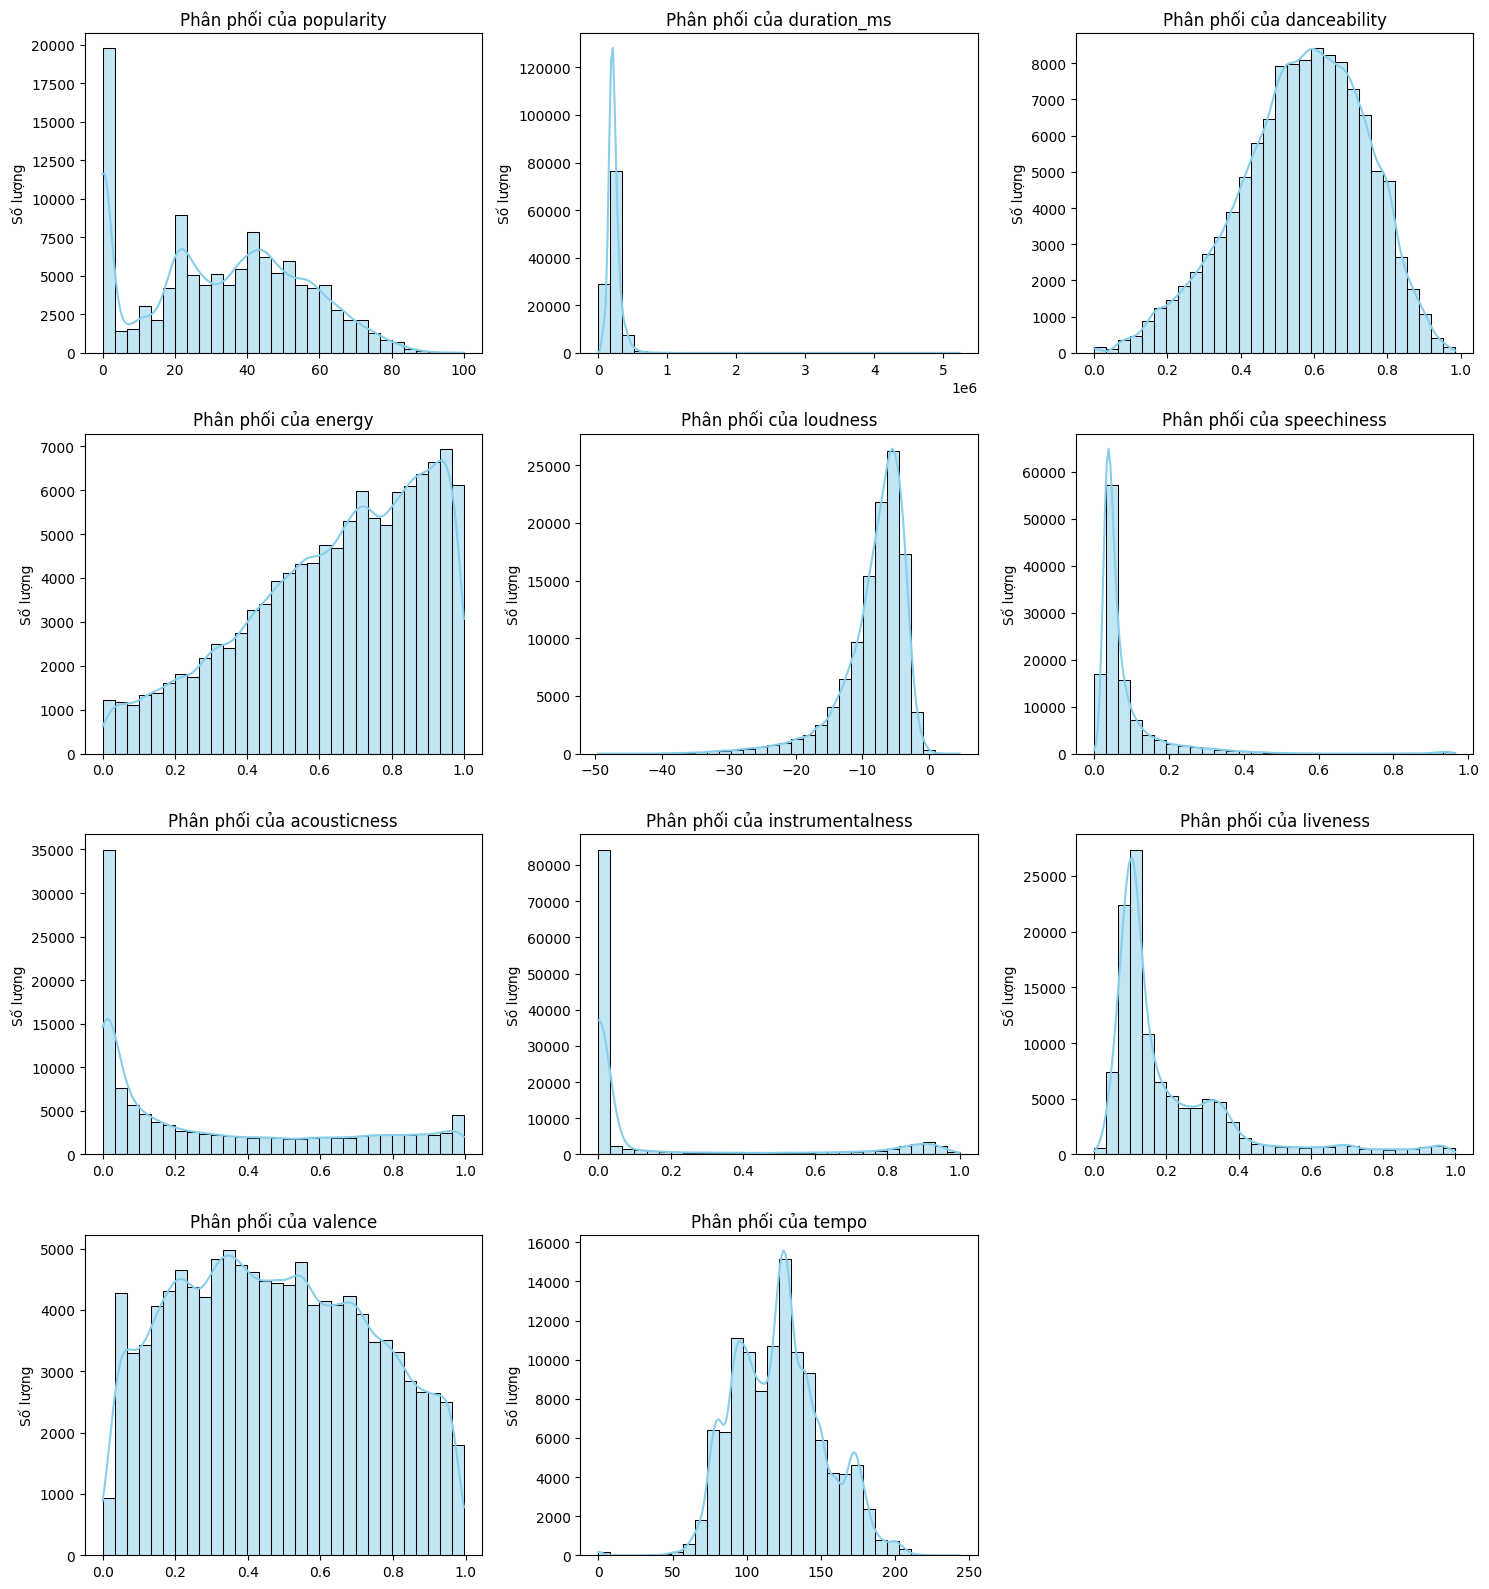

In [143]:
# Thống kê mô tả (Mean, Median, Std, Min, Max)
display(df.describe())

# Tính toán kích thước lưới biểu đồ
num_plots = len(numerical_cols)
cols = 3  # Số biểu đồ trên 1 hàng
rows = math.ceil(num_plots / cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Phân phối Chuẩn: **danceability**, **valence** và **tempo**
* Phân phối Lệch:
    * Lệch phải: **loudness** và **energy**
    * Lệch trái: **popularity**, **duration_ms**, **speechiness**, **acousticness**, **instrumentalness** và **liveness**

#### Ma trận tương quan cho biến số

In [144]:
corr_matrix = df[numerical_cols].corr()
np.fill_diagonal(corr_matrix.values, np.nan)

# In ma trận tương quan (các giá trị làm tròn)
print("--- Ma trận Tương quan Pearson (Correlation Matrix) ---\n")
corr_matrix.round(2)

--- Ma trận Tương quan Pearson (Correlation Matrix) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,NaN,-0.01,0.04,0.00,0.05,-0.04,-0.03,-0.10,-0.01,-0.04,0.01
duration_ms,-0.01,NaN,-0.07,0.06,-0.00,-0.06,-0.10,0.12,0.01,-0.15,0.02
danceability,0.04,-0.07,NaN,0.13,0.26,0.11,-0.17,-0.19,-0.13,0.48,-0.05
energy,0.00,0.06,0.13,NaN,0.76,0.14,-0.73,-0.18,0.18,0.26,0.25
loudness,0.05,-0.00,0.26,0.76,NaN,0.06,-0.59,-0.43,0.08,0.28,0.21
speechiness,-0.04,-0.06,0.11,0.14,0.06,NaN,-0.00,-0.09,0.21,0.04,0.02
acousticness,-0.03,-0.10,-0.17,-0.73,-0.59,-0.00,NaN,0.10,-0.02,-0.11,-0.21
instrumentalness,-0.10,0.12,-0.19,-0.18,-0.43,-0.09,0.10,NaN,-0.08,-0.32,-0.05
liveness,-0.01,0.01,-0.13,0.18,0.08,0.21,-0.02,-0.08,NaN,0.02,0.00
valence,-0.04,-0.15,0.48,0.26,0.28,0.04,-0.11,-0.32,0.02,NaN,0.08


#### Bản Đồ Nhiệt Tương Quan

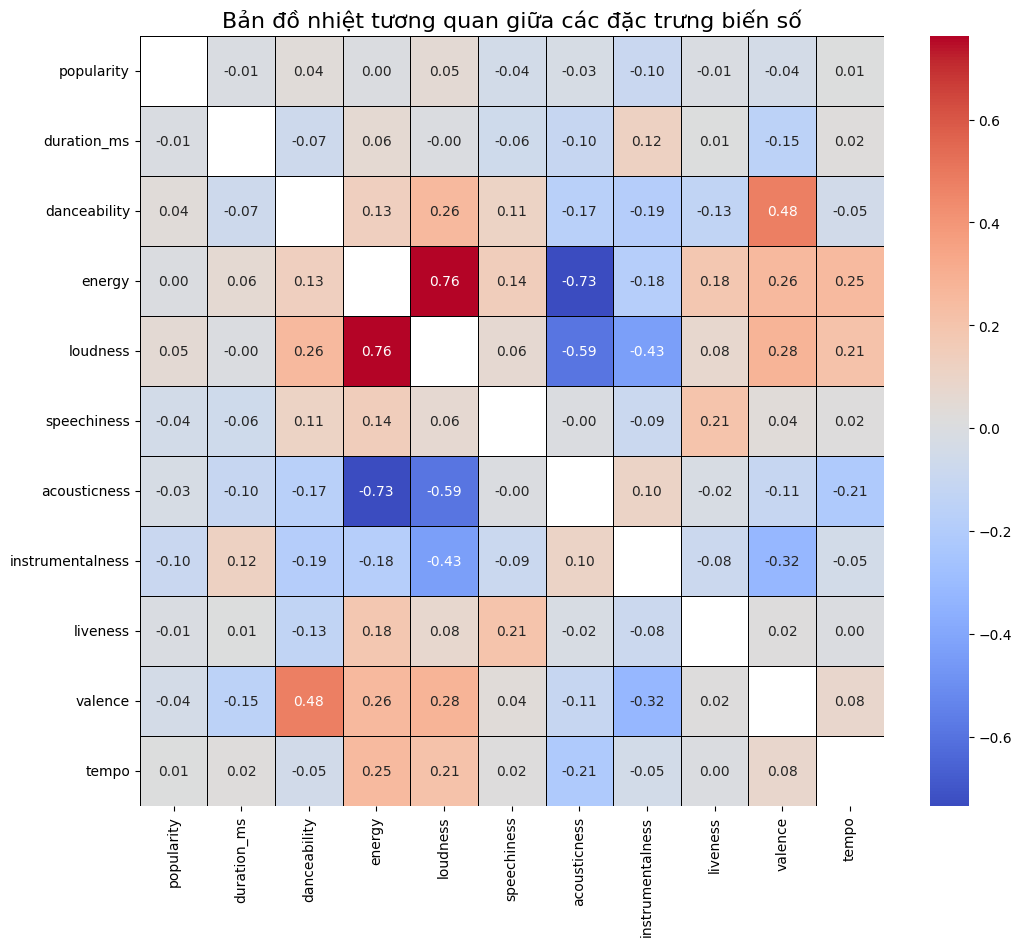

In [145]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # Hiển thị giá trị tương quan lên biểu đồ
    fmt=".2f",          
    cmap='coolwarm',     
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title('Bản đồ nhiệt tương quan giữa các đặc trưng biến số', fontsize=16)
plt.show()

In [146]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Lấy ma trận tam giác trên
strong_correlations = upper_triangle.unstack().sort_values(ascending=False, key=abs).dropna()

print("--- Top 5 Cặp Tương Quan Mạnh Nhất (Positive và Negative) ---\n")
print(strong_correlations.head(5))

--- Top 5 Cặp Tương Quan Mạnh Nhất (Positive và Negative) ---

loudness          energy          0.761690
acousticness      energy         -0.733906
                  loudness       -0.589803
valence           danceability    0.477341
instrumentalness  loudness       -0.433477
dtype: float64


#### Mối Quan Hệ Đáng Ngạc Nhiên (Surprising Relationship) ?

Trong các cặp trên, không có cặp nào thực sự "gây sốc" vì chúng phản ánh các quy luật sản xuất âm nhạc hợp lý.

Tuy nhiên, mối tương quan giữa `valence` và `danceability` (r ≈ 0.48) có thể là một điểm thú vị để đào sâu:

- **Tại sao chỉ là 0.48?** Điều này gợi ý rằng *tính nhảy múa (danceability)* không chỉ phụ thuộc vào *tâm trạng (valence)*. Nó cho thấy các yếu tố khác (như `tempo`, `time_signature`, hoặc thậm chí là `popularity`) đóng vai trò quan trọng trong việc quyết định xem một bài hát có dễ nhảy hay không.


#### Bảng Tần Số cho Phân loại $\times$ Phân loại (Categorical $\times$ Categorical)

In [147]:
key_mode_crosstab_frequency = pd.crosstab(df['key'], df['mode'])
print("--- Bảng Tần số Mode theo Key ---\n")
key_mode_crosstab_frequency

--- Bảng Tần số Mode theo Key ---



mode,0,1
key,,
0,2864,10197
1,3595,7177
2,2582,9062
3,1344,2226
4,4733,4275
5,4024,5344
6,3825,4096
7,3096,10149
8,1918,5442


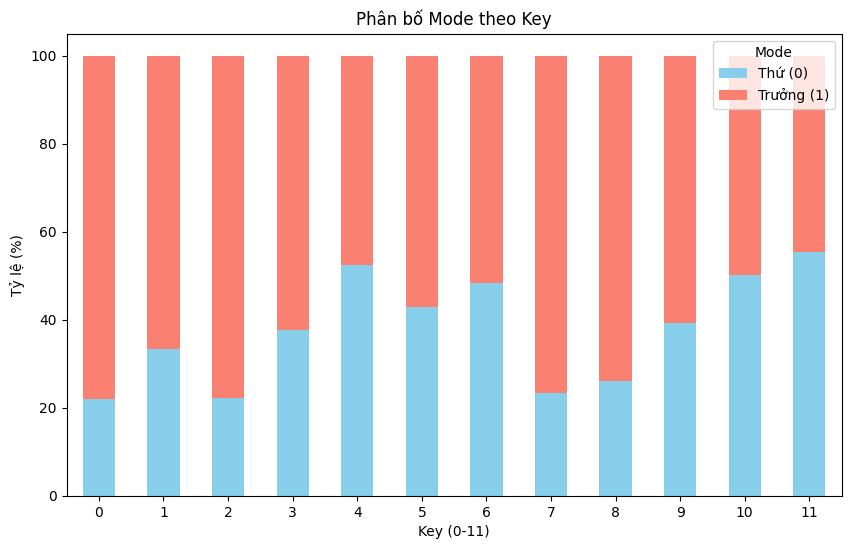

In [148]:
key_mode_crosstab = pd.crosstab(df['key'], df['mode'], normalize='index') * 100

# Ví dụ trực quan hóa: biểu đồ thanh xếp chồng (stacked bar chart)
key_mode_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Phân bố Mode theo Key')
plt.xlabel('Key (0-11)')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Mode', labels=['Thứ (0)', 'Trưởng (1)'])
plt.xticks(rotation=0)
plt.show()

In [149]:
time_mode_crosstab_frequency = pd.crosstab(df['time_signature'], df['mode'])
print("--- Bảng Tần số Mode theo Time Signature ---\n")
time_mode_crosstab_frequency

--- Bảng Tần số Mode theo Time Signature ---



mode,0,1
time_signature,,
0,52,111
1,324,649
3,2923,6272
4,37311,64532
5,709,1117


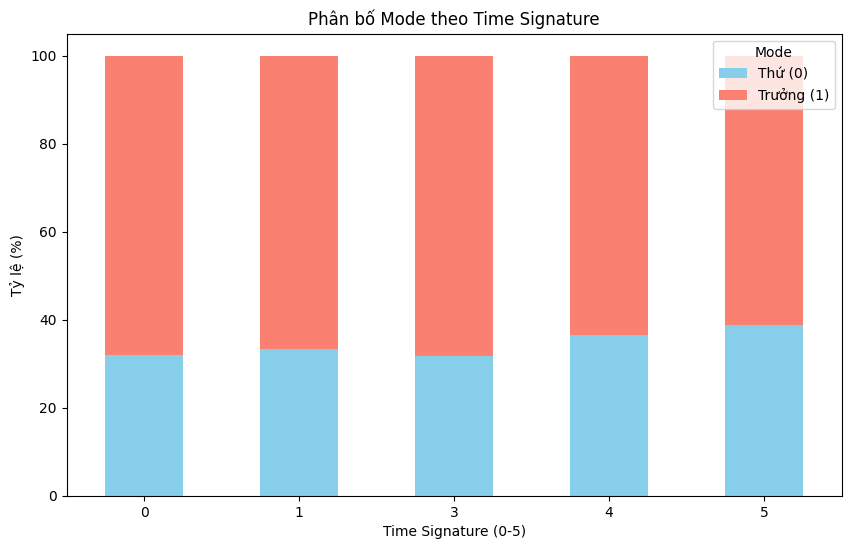

In [150]:
time_mode_crosstab = pd.crosstab(df['time_signature'], df['mode'], normalize='index') * 100

time_mode_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Phân bố Mode theo Time Signature')
plt.xlabel('Time Signature (0-5)')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Mode', labels=['Thứ (0)', 'Trưởng (1)'])
plt.xticks(rotation=0)
plt.show()

#### Thống Kê Nhóm cho Biến Số $\times$ Phân loại (Numerical $\times$ Categorical)

In [151]:
# Tính giá trị trung bình (mean) của các đặc trưng quan trọng theo 'mode'
mode_grouped_stats = df.groupby('mode')[numerical_cols].mean()
mode_grouped_stats.rename(index={0: 'Minor (Thứ)', 1: 'Major (Trưởng)'}, inplace=True)

print("--- Thống kê Nhóm Biến Số theo Mode ---\n")
mode_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Mode ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mode,,,,,,,,,,,
Minor (Thứ),33.651,233088.953,0.583,0.668,-7.980,0.091,0.273,0.177,0.210,0.467,122.125
Major (Trưởng),33.004,225152.667,0.558,0.627,-8.417,0.081,0.339,0.144,0.216,0.478,122.161


In [152]:
explicit_grouped_stats = df.groupby('explicit')[numerical_cols].mean()

explicit_grouped_stats.rename(index={False: 'Not Explicit', True: 'Explicit'}, inplace=True)

print("--- Thống kê Nhóm Biến Số theo Explicit (Nội dung nhạy cảm) ---\n")
explicit_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Explicit (Nội dung nhạy cảm) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
explicit,,,,,,,,,,,
Not Explicit,32.938,230170.30,0.560,0.634,-8.426,0.075,0.325,0.166,0.212,0.474,122.174
Explicit,36.454,205127.65,0.636,0.721,-6.473,0.191,0.212,0.051,0.234,0.471,121.872


In [153]:
time_signature_grouped_stats = df.groupby('time_signature')[numerical_cols].mean()

print("--- Thống kê Nhóm Biến Số theo Time Signature (Số chỉ nhịp) ---\n")
time_signature_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Time Signature (Số chỉ nhịp) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
time_signature,,,,,,,,,,,
0,36.975,173239.933,0.015,0.132,-21.833,0.002,0.500,0.638,0.441,0.014,4.453
1,29.074,208222.929,0.423,0.460,-12.878,0.126,0.590,0.307,0.246,0.334,108.216
3,29.692,222407.808,0.437,0.452,-11.738,0.095,0.569,0.228,0.213,0.343,122.400
4,33.672,229292.623,0.583,0.664,-7.813,0.082,0.285,0.146,0.213,0.490,122.609
5,28.778,201312.197,0.460,0.486,-11.929,0.175,0.519,0.242,0.222,0.363,113.080


In [154]:
key_grouped_stats = df.groupby('key')[numerical_cols].mean()

print("--- Thống kê Nhóm Biến Số theo Key (Tông nhạc) ---\n")
key_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Key (Tông nhạc) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
key,,,,,,,,,,,
0,32.520,222113.255,0.561,0.609,-8.691,0.072,0.352,0.148,0.212,0.486,121.490
1,33.200,230937.197,0.578,0.683,-7.877,0.104,0.250,0.179,0.207,0.447,123.308
2,34.378,229086.509,0.545,0.617,-8.656,0.077,0.349,0.157,0.223,0.458,121.598
3,33.032,223043.214,0.547,0.570,-9.243,0.081,0.419,0.176,0.195,0.443,118.189
4,34.644,232105.096,0.556,0.635,-8.296,0.080,0.327,0.141,0.227,0.459,122.608
5,32.931,224688.898,0.567,0.617,-8.471,0.079,0.352,0.153,0.215,0.484,119.402
6,33.586,230488.715,0.581,0.676,-7.693,0.097,0.261,0.161,0.205,0.474,123.556
7,32.580,230065.042,0.564,0.636,-8.392,0.080,0.321,0.161,0.220,0.476,122.774
8,32.959,224208.789,0.580,0.663,-7.693,0.092,0.284,0.148,0.192,0.480,122.869
